# Project Title: Heart Disease Prediction
# By: Kawuribi Zakaria

## Column description:

* **Chest Pain:** This refers to discomfort or pain felt in the chest area, often associated with heart problems like angina.
* **RestBP:** Short for Resting Blood Pressure, it measures the pressure of blood in your arteries when your body is at rest.
* **Chol:** Abbreviation for Cholesterol, a fatty substance found in your blood that can build up in your arteries and increase your risk of heart disease.
* **Fbs:** Stands for Fasting Blood Sugar, a measure of the amount of glucose (sugar) in your blood after not eating for at least 8 hours. High levels can indicate diabetes, a risk factor for heart disease.
* **RestECG:** Short for Resting Electrocardiogram, it records the electrical activity of your heart while you're at rest. It can help detect abnormalities in your heart rhythm.
* **MaxHR:** Stands for Maximum Heart Rate, the highest your heart rate reaches during intense exercise.
* **ExAng:** Short for Exercise-Induced Angina, it refers to chest pain or discomfort that occurs during physical activity.
* **Oldpeak:** Stands for ST Depression, a measure of how much the ST segment of an electrocardiogram (ECG) is depressed during exercise compared to rest. It's a sign of heart ischemia (lack of blood flow to the heart).
* **Slope:** Refers to the slope of the ST segment during an exercise stress test. It can help assess the severity of heart disease.
* **Ca:** Stands for Number of Major Vessels (0-3) colored by flourosopy, a measure of the extent of coronary artery disease.
* **Thal:** Refers to a thallium stress test, a nuclear imaging test that evaluates blood flow to the heart muscle.
* **AHD:** Stands for Presence of Heart Disease (0 = o your doctor.


## Importing the needed libraries and models

In [1]:
## librarie(s) for loading and preprocessing 
import numpy as np
import pandas as pd 

## libarie(s) for visualization 
import matplotlib.pyplot as plt
import seaborn as sns

## library for building a validation framwork
from sklearn.model_selection import train_test_split, cross_val_score

##library for data scaling 
from sklearn.preprocessing import StandardScaler

## library for feature engineering 
from sklearn.feature_extraction import DictVectorizer

## libraries for computing classification accuracy score
from sklearn.metrics import (f1_score, accuracy_score, recall_score, precision_score,
                            confusion_matrix, roc_auc_score)

## library for ml algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier)
# from xgboost import XGBClassifier 


import warnings 
warnings.filterwarnings("ignore")

# Loading and Data Overview

In [2]:
# load dataset
heart_data = pd.read_csv('Heart.csv')

# create a copy of dataset
heart = heart_data.copy()

In [3]:
# view first five rows
heart.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
# view last five rows
heart.tail()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes
302,38,1,nonanginal,138,175,0,0,173,0,0.0,1,NaN,normal,No


In [5]:
# check for brief column summary
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


- Null values in Ca and Thal columns
- Change Sex, Fbs, ExgAng and Ca to object

In [6]:
# null values
heart.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [7]:
# check for duplicates
heart.duplicated().sum()

np.int64(0)

# Data Processing
- Normalize column names
- Replace null values
- Change data types
- Convert target column to numeric

In [8]:
# Normalize column names
heart.columns = heart.columns.str.lower()
heart.columns

Index(['age', 'sex', 'chestpain', 'restbp', 'chol', 'fbs', 'restecg', 'maxhr',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'ahd'],
      dtype='object')

In [9]:
# Replace null values in Ca and Thal
heart.ca.fillna(heart.ca.mode()[0], inplace=True)
heart.thal.fillna(heart.thal.mode()[0], inplace=True)
heart.isna().sum()

age          0
sex          0
chestpain    0
restbp       0
chol         0
fbs          0
restecg      0
maxhr        0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
ahd          0
dtype: int64

In [10]:
# change data types of Sex, Fbs, ExgAng and Ca to object
heart.sex = heart.sex.astype(object)
heart.fbs = heart.fbs.astype(object)
heart.exang = heart.exang.astype(object)
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   sex        303 non-null    object 
 2   chestpain  303 non-null    object 
 3   restbp     303 non-null    int64  
 4   chol       303 non-null    int64  
 5   fbs        303 non-null    object 
 6   restecg    303 non-null    int64  
 7   maxhr      303 non-null    int64  
 8   exang      303 non-null    object 
 9   oldpeak    303 non-null    float64
 10  slope      303 non-null    int64  
 11  ca         303 non-null    float64
 12  thal       303 non-null    object 
 13  ahd        303 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 33.3+ KB


In [11]:
# unique values in all object data types
for column in heart.select_dtypes(include=[object]).columns:
    print(column, 'unique')
    print(heart[column].unique(), '\n')

sex unique
[1 0] 

chestpain unique
['typical' 'asymptomatic' 'nonanginal' 'nontypical'] 

fbs unique
[1 0] 

exang unique
[0 1] 

thal unique
['fixed' 'normal' 'reversable'] 

ahd unique
['No' 'Yes'] 



In [12]:
# Convert target column to numeric
heart.ahd = heart.ahd.map({'Yes': 1, 'No': 0})
heart.ahd.dtype

dtype('int64')

# Data Exploration

In [13]:
# percentage of patients with heart disease
heart.ahd.value_counts(normalize=True).round(3) * 100

ahd
0    54.1
1    45.9
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Age Distribution')

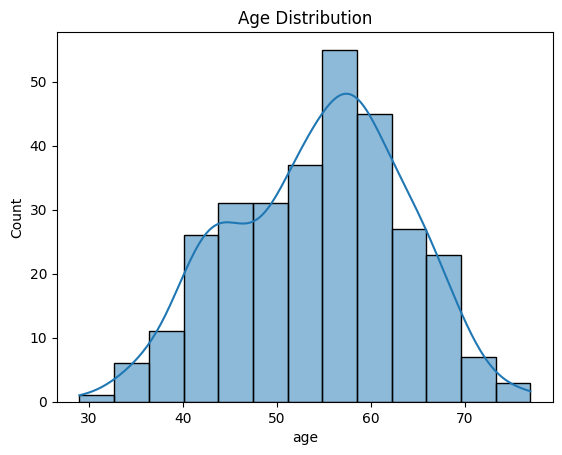

In [14]:
# age distribution
sns.histplot(heart.age, kde=True)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Correlation Matrix')

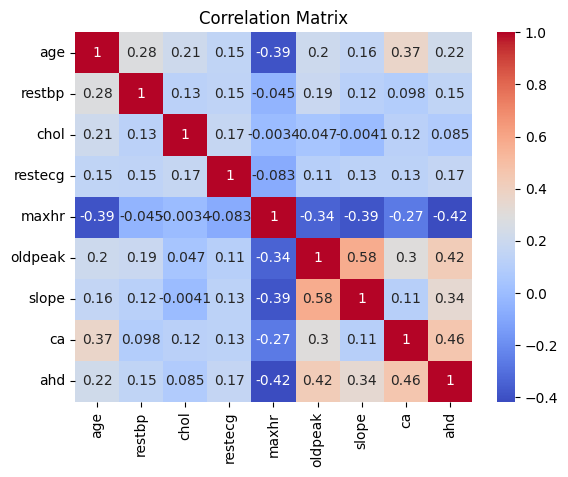

In [15]:
# correlation between numeric variables
sns.heatmap(heart.select_dtypes(exclude=[object]).corr(), annot=True, cmap = 'coolwarm')
plt.title('Correlation Matrix')

In [16]:
# insight between selected numerical dtypes and AHD
numeric = ['age', 'restbp', 'chol', 'maxhr']
for column in numeric:
    temp = heart.groupby('ahd')[column].mean().round(2)
    print(f'{column} with ahd status'.upper())
    print(temp, '\n')

AGE WITH AHD STATUS
ahd
0    52.59
1    56.63
Name: age, dtype: float64 

RESTBP WITH AHD STATUS
ahd
0    129.25
1    134.57
Name: restbp, dtype: float64 

CHOL WITH AHD STATUS
ahd
0    242.64
1    251.47
Name: chol, dtype: float64 

MAXHR WITH AHD STATUS
ahd
0    158.38
1    139.26
Name: maxhr, dtype: float64 



In [17]:
# relation between object dtypes and AHD
# Are there relationship between object dtypes and churn?
from tabulate import tabulate

categorical_cols = heart.select_dtypes(include=['object']).columns

for column in categorical_cols:
    temp = pd.crosstab(heart[column], heart.ahd, normalize='index').round(4)*100
    print(f"\nRelation between {column} and ahd".upper())
    print(tabulate(temp, headers='keys', tablefmt='presto'))


RELATION BETWEEN SEX AND AHD
   sex |     0 |     1
-------+-------+-------
     0 | 74.23 | 25.77
     1 | 44.66 | 55.34

RELATION BETWEEN CHESTPAIN AND AHD
 chestpain    |     0 |     1
--------------+-------+-------
 asymptomatic | 27.08 | 72.92
 nonanginal   | 79.07 | 20.93
 nontypical   | 82    | 18
 typical      | 69.57 | 30.43

RELATION BETWEEN FBS AND AHD
   fbs |     0 |     1
-------+-------+-------
     0 | 54.65 | 45.35
     1 | 51.11 | 48.89

RELATION BETWEEN EXANG AND AHD
   exang |     0 |     1
---------+-------+-------
       0 | 69.12 | 30.88
       1 | 23.23 | 76.77

RELATION BETWEEN THAL AND AHD
 thal       |     0 |     1
------------+-------+-------
 fixed      | 33.33 | 66.67
 normal     | 77.38 | 22.62
 reversable | 23.93 | 76.07


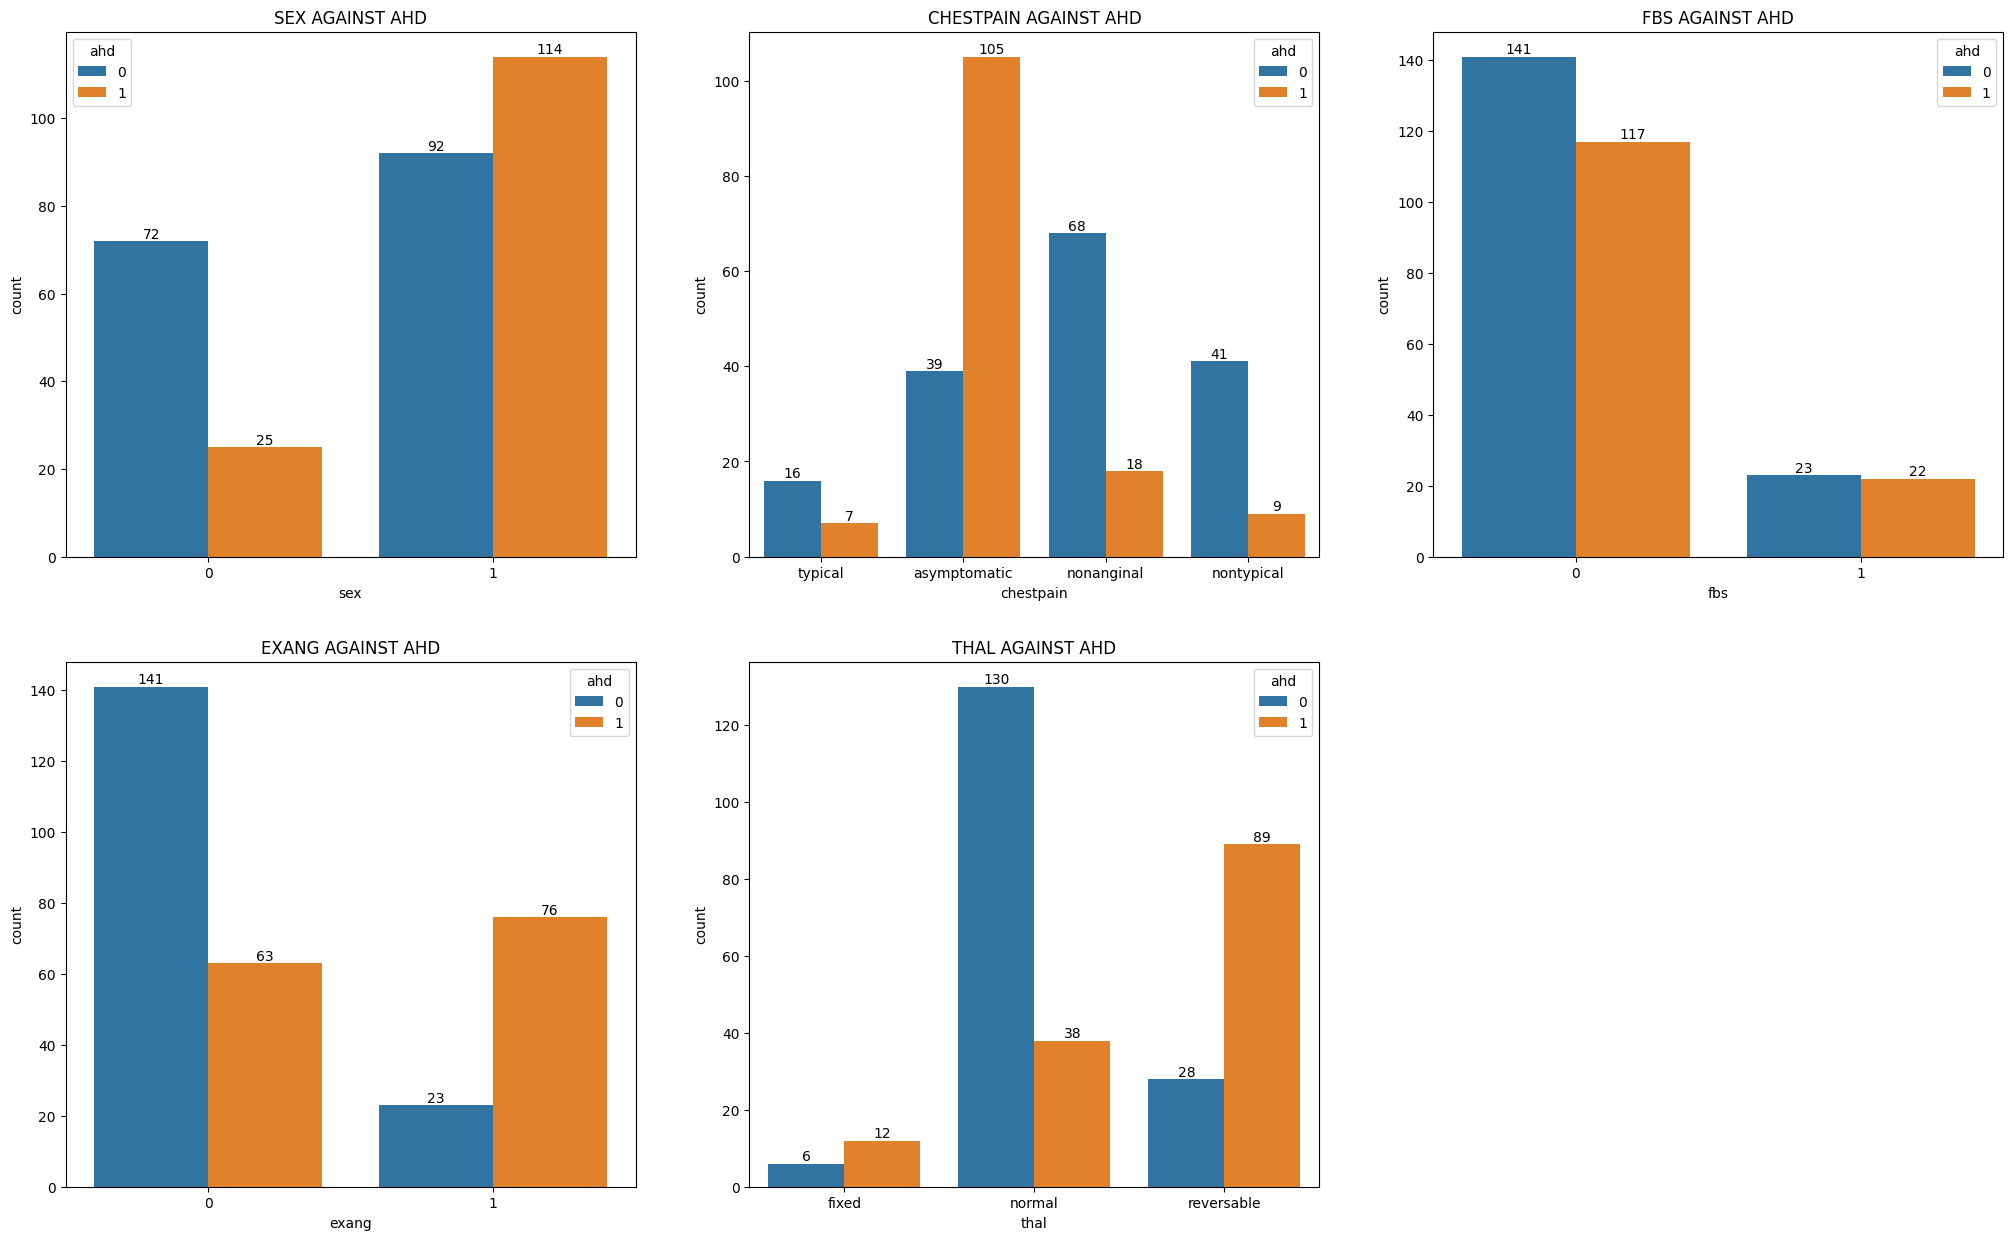

In [18]:
# graphical representation of the above
plt.figure(figsize=(25,15))
i = 0

for column in categorical_cols:
    i += 1
    plt.subplot(2, 3, i)
    ax = sns.countplot(data=heart, x = column, hue='ahd')
    plt.title(f'{column} against ahd'.upper())
    for container in ax.containers: # for loop to display the the count
        ax.bar_label(container)

plt.show()

Text(0.5, 1.0, 'Rate of Heart Disease by Age')

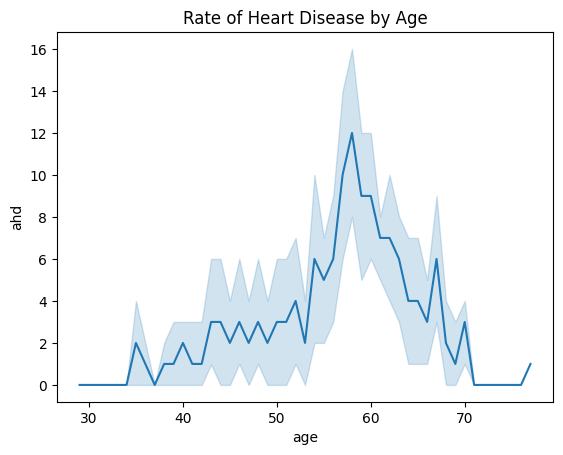

In [19]:
# heart disease rate by age
sns.lineplot(data=heart, x='age', y='ahd', estimator='sum')
plt.title('Rate of Heart Disease by Age')

# Machine Learning

# Splitting the dataset
- Training 80%
- Validation 10%
- Testing 10%

In [20]:
df_train_full, df_test = train_test_split(heart, test_size = 0.1, random_state = 18)
df_train, df_valid = train_test_split(df_train_full, test_size = 1/9, random_state = 18)

print(f'Training dataset {df_train.shape}')
print(f'Validation dataset {df_valid.shape}')
print(f'Testing dataset {df_test.shape}')

Training dataset (241, 14)
Validation dataset (31, 14)
Testing dataset (31, 14)


In [21]:
# select target column
y_train = df_train['ahd'].values
y_valid = df_valid['ahd'].values
y_test = df_test['ahd'].values

In [22]:
# delete target columns from the rest of the dataframe
del df_train['ahd']
del df_valid['ahd']
del df_test['ahd']

In [23]:
# confirm deleted churn variable
df_train.head()

,age,sex,chestpain,restbp,chol,fbs,restecg,maxhr,exang,oldpeak,slope,ca,thal
258,70,1,nontypical,156,245,0,2,143,0,0.0,1,0.0,normal
101,34,1,typical,118,182,0,2,174,0,0.0,1,0.0,normal
265,42,1,asymptomatic,136,315,0,0,125,1,1.8,2,0.0,fixed
225,34,0,nontypical,118,210,0,0,192,0,0.7,1,0.0,normal
92,62,1,nonanginal,130,231,0,0,146,0,1.8,2,3.0,reversable


# Feature Engineering

In [24]:
# convert dataframe into dict
train_dict = df_train.to_dict(orient = 'records')
train_valid = df_valid.to_dict(orient = 'records')

# train the vectorizer with train_dict (encoding)
dv = DictVectorizer()
dv.fit(train_dict)

# transform data into arrays
X_train = dv.transform(train_dict)
X_valid = dv.transform(train_valid)

print('Training Data Shape:',X_train.shape)
print('Validation Data Shape:',X_valid.shape)

Training Data Shape: (241, 18)
Validation Data Shape: (31, 18)


# Training Models

LOGISTIC REGRESSION MODEL

Actual:    [0 1 1 0 1 0 1 1 1 0]
Predicted: [0 0 1 0 0 0 1 1 1 0]

Accuracy Score: 80.65% 

Recall Score: 0.6

Precision Score: 1.0

Specificity: 1.0

f1 Score: 0.75

Confusion Matrix:
 [[16  0]
 [ 6  9]]


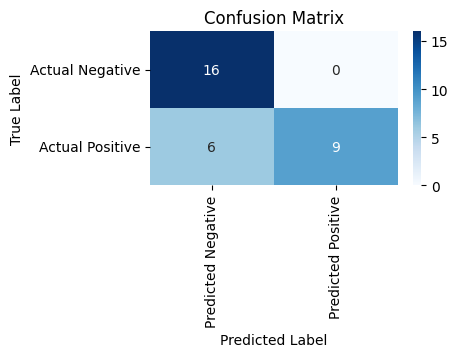

In [25]:
# using LOGISTIC REGRESSION algorithm
# instantiate the model
model_log = LogisticRegression(solver = 'liblinear', random_state = 18)
print('LOGISTIC REGRESSION MODEL\n')

# fit model/ algorithm with training data
model_log.fit(X_train, y_train)

# use model for prediction
y_valid_log = model_log.predict(X_valid)
print('Actual:   ', y_valid[:10]) # print first 10 elements
print('Predicted:', y_valid_log[:10])

# compute accuracy score
acc_score_log = accuracy_score(y_valid, y_valid_log)
print(f'\nAccuracy Score: {round(acc_score_log * 100, 2)}% ')

recall_log = recall_score(y_valid, y_valid_log)
print(f'\nRecall Score: {round(recall_log,2)}')

precision_log = precision_score(y_valid, y_valid_log)
print(f'\nPrecision Score: {round(precision_log,2)}')

specificity_log = recall_score(y_valid, y_valid_log, pos_label=0) # True Negative Rates
print(f'\nSpecificity: {round(specificity_log,2)}')

f1_log = f1_score(y_valid, y_valid_log)
print(f'\nf1 Score: {round(f1_log,2)}')

cm_log = confusion_matrix(y_valid, y_valid_log)
print('\nConfusion Matrix:\n', cm_log)

# visualize confusion matrix using heatmap
plt.figure(figsize=(4,2))
sns.heatmap(data=cm_log, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

RANDOM FOREST CLASSIFIER MODEL

Actual:    [0 1 1 0 1 0 1 1 1 0]
Predicted: [0 0 1 0 0 0 1 1 1 0]

Accuracy Score: 77.42% 

Recall Score: 0.53

Precision Score: 1.0

Specificity: 1.0

f1 Score: 0.7

Confusion Matrix:
 [[16  0]
 [ 7  8]]


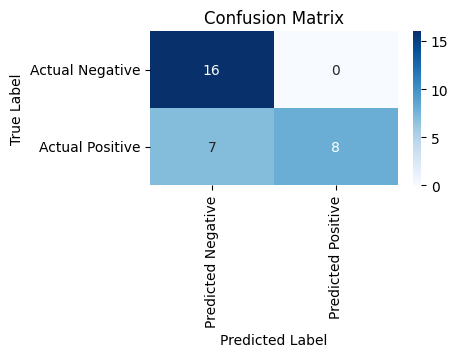

In [26]:
# using RANDOM FOREST CLASSIFIER algorithm
# instantiate the model
model_ran = RandomForestClassifier(n_estimators=150, random_state=18, criterion='entropy', n_jobs=-1)
print('RANDOM FOREST CLASSIFIER MODEL\n')

# fit model/ algorithm with training data
model_ran.fit(X_train, y_train)

# use model for prediction
y_valid_ran = model_ran.predict(X_valid)
print('Actual:   ', y_valid[:10]) # print first 10 elements
print('Predicted:', y_valid_ran[:10])

# compute accuracy score
acc_score_ran = accuracy_score(y_valid, y_valid_ran)
print(f'\nAccuracy Score: {round(acc_score_ran * 100, 2)}% ')

recall_ran = recall_score(y_valid, y_valid_ran)
print(f'\nRecall Score: {round(recall_ran,2)}')

precision_ran = precision_score(y_valid, y_valid_ran)
print(f'\nPrecision Score: {round(precision_ran,2)}')

specificity_ran = recall_score(y_valid, y_valid_ran, pos_label=0) # True Negative Rates
print(f'\nSpecificity: {round(specificity_ran,2)}')

f1_ran = f1_score(y_valid, y_valid_ran)
print(f'\nf1 Score: {round(f1_ran,2)}')

cm_ran = confusion_matrix(y_valid, y_valid_ran)
print('\nConfusion Matrix:\n', cm_ran)

# visualize confusion matrix using heatmap
plt.figure(figsize=(4,2))
sns.heatmap(data=cm_ran, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

DECISION TREE CLASSIFIER MODEL

Actual:    [0 1 1 0 1 0 1 1 1 0]
Predicted: [0 0 1 0 0 0 0 1 0 0]

Accuracy Score: 67.74% 

Recall Score: 0.33

Precision Score: 1.0

Specificity: 1.0

f1 Score: 0.5

Confusion Matrix:
 [[16  0]
 [10  5]]


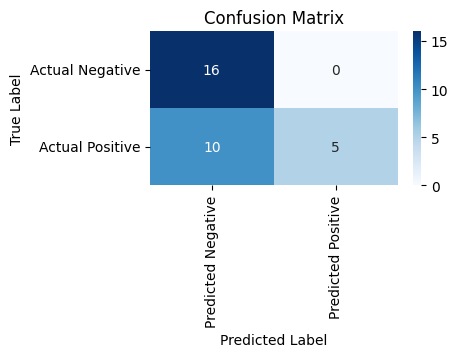

In [27]:
# using DECISION TREE CLASSIFIER algorithm
# instantiate the model
model_dec = DecisionTreeClassifier(random_state=18, criterion='entropy')
print('DECISION TREE CLASSIFIER MODEL\n')

# fit model/ algorithm with training data
model_dec.fit(X_train, y_train)

# use model for prediction
y_valid_dec = model_dec.predict(X_valid)
print('Actual:   ', y_valid[:10]) # print first 10 elements
print('Predicted:', y_valid_dec[:10])

# compute accuracy score
acc_score_dec = accuracy_score(y_valid, y_valid_dec)
print(f'\nAccuracy Score: {round(acc_score_dec * 100, 2)}% ')

recall_dec = recall_score(y_valid, y_valid_dec)
print(f'\nRecall Score: {round(recall_dec,2)}')

precision_dec = precision_score(y_valid, y_valid_dec)
print(f'\nPrecision Score: {round(precision_dec,2)}')

specificity_dec = recall_score(y_valid, y_valid_dec, pos_label=0) # True Negative Rates
print(f'\nSpecificity: {round(specificity_dec,2)}')

f1_dec = f1_score(y_valid, y_valid_dec)
print(f'\nf1 Score: {round(f1_dec,2)}')

cm_dec = confusion_matrix(y_valid, y_valid_dec)
print('\nConfusion Matrix:\n', cm_dec)

# visualize confusion matrix using heatmap
plt.figure(figsize=(4,2))
sns.heatmap(data=cm_dec, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

ADABOOST CLASSIFIER MODEL

Actual:    [0 1 1 0 1 0 1 1 1 0]
Predicted: [0 0 1 0 0 0 0 1 1 0]

Accuracy Score: 74.19% 

Recall Score: 0.53

Precision Score: 0.89

Specificity: 0.94

f1 Score: 0.67

Confusion Matrix:
 [[15  1]
 [ 7  8]]


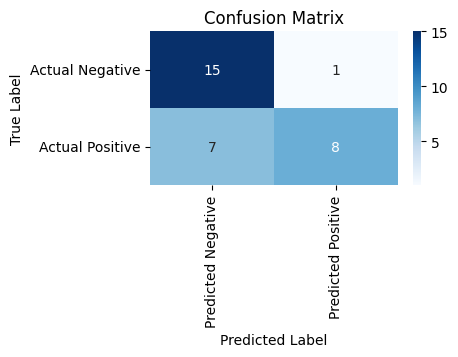

In [28]:
# using ADABOOST CLASSIFIER algorithm
# instantiate the model
model_ada = AdaBoostClassifier(n_estimators= 150,random_state=18, learning_rate= 0.9)
print('ADABOOST CLASSIFIER MODEL\n')

# fit model/ algorithm with training data
model_ada.fit(X_train, y_train)

# use model for prediction
y_valid_ada = model_ada.predict(X_valid)
print('Actual:   ', y_valid[:10]) # print first 10 elements
print('Predicted:', y_valid_ada[:10])

# compute accuracy score
acc_score_ada = accuracy_score(y_valid, y_valid_ada)
print(f'\nAccuracy Score: {round(acc_score_ada * 100, 2)}% ')

recall_ada = recall_score(y_valid, y_valid_ada)
print(f'\nRecall Score: {round(recall_ada,2)}')

precision_ada = precision_score(y_valid, y_valid_ada)
print(f'\nPrecision Score: {round(precision_ada,2)}')

specificity_ada = recall_score(y_valid, y_valid_ada, pos_label=0) # True Negative Rates
print(f'\nSpecificity: {round(specificity_ada,2)}')

f1_ada = f1_score(y_valid, y_valid_ada)
print(f'\nf1 Score: {round(f1_ada,2)}')

cm_ada = confusion_matrix(y_valid, y_valid_ada)
print('\nConfusion Matrix:\n', cm_ada)

# visualize confusion matrix using heatmap
plt.figure(figsize=(4,2))
sns.heatmap(data=cm_ada, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

GRADIENT BOOSTING CLASSIFIER MODEL

Actual:    [0 1 1 0 1 0 1 1 1 0]
Predicted: [0 0 1 0 0 0 1 0 1 0]

Accuracy Score: 67.74% 

Recall Score: 0.47

Precision Score: 0.78

Specificity: 0.88

f1 Score: 0.58

Confusion Matrix:
 [[14  2]
 [ 8  7]]


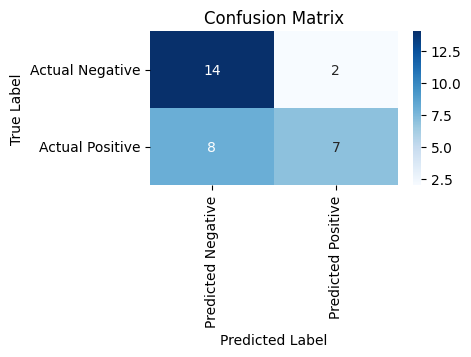

In [29]:
# using GRADIENT BOOSTING CLASSIFIER algorithm
# instantiate the model
model_grad = GradientBoostingClassifier(n_estimators= 150,random_state=18, learning_rate= 0.9)
print('GRADIENT BOOSTING CLASSIFIER MODEL\n')

# fit model/ algorithm with training data
model_grad.fit(X_train, y_train)

# use model for prediction
y_valid_grad = model_grad.predict(X_valid)
print('Actual:   ', y_valid[:10]) # print first 10 elements
print('Predicted:', y_valid_grad[:10])

# compute accuracy score
acc_score_grad = accuracy_score(y_valid, y_valid_grad)
print(f'\nAccuracy Score: {round(acc_score_grad * 100, 2)}% ')

recall_grad = recall_score(y_valid, y_valid_grad)
print(f'\nRecall Score: {round(recall_grad,2)}')

precision_grad = precision_score(y_valid, y_valid_grad)
print(f'\nPrecision Score: {round(precision_grad,2)}')

specificity_grad = recall_score(y_valid, y_valid_grad, pos_label=0) # True Negative Rates
print(f'\nSpecificity: {round(specificity_grad,2)}')

f1_grad = f1_score(y_valid, y_valid_grad)
print(f'\nf1 Score: {round(f1_grad,2)}')

cm_grad = confusion_matrix(y_valid, y_valid_grad)
print('\nConfusion Matrix:\n', cm_grad)

# visualize confusion matrix using heatmap
plt.figure(figsize=(4,2))
sns.heatmap(data=cm_grad, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

- The Logistic Regression Algorithm will be chosen since it has the highest accuracy score

# Saving Model

In [30]:
# import pickle library
import pickle

# specify where to save the file
with open('AHD-model.bin', 'wb') as f_out:
    # save the model
    pickle.dump((dv, model_log), f_out)

# Loading Model

In [31]:
with open('AHD-model.bin', 'rb') as f_in:
    dv, model = pickle.load(f_in)

In [32]:
# sample patient
patient_0 = {'age': 59,
  'sex': 1,
  'chestpain': 'typical',
  'restbp': 160,
  'chol': 273,
  'fbs': 0,
  'restecg': 2,
  'maxhr': 125,
  'exang': 0,
  'oldpeak': 0.0,
  'slope': 1,
  'ca': 0.0,
  'thal': 'normal'}

In [33]:
# create a function to make a single prediction
def predict_single(patient_data, dv, model):
    X = dv.transform([patient_data])
    y_predict = model.predict(X)
    return y_predict[0]

In [34]:
# call the function to make the prediction
prediction = predict_single(patient_0, dv, model)
print(f'{prediction}')

0


In [35]:
# lets make the prediction by setting the threshold and returning a verdict
# 'verdict: AHD' , 'verdict: No AHD'
if prediction == 1:
    print('Verdict: AHD')
else: print('Verdict: No AHD')

Verdict: No AHD
